### 1. Problem Definition:
- The goal of the Energy Consumption Forecasting Project is to develop an accurate and reliable model that can predict future energy consumption for a given region or facility. This project addresses the need for efficient energy management and resource planning by providing insights into future energy demand patterns.

### 2. Data Collection:

- Data has been downloaded from UCI Machine Learning Repository in the form of csv file.

### 3. Feature Description:

+ DateTime                 -	Each ten minutes
+ Temperature              -	Weather Temperature of Tetouan city
+ Humidity                 -	Weather Humidity of Tetouan city
+ Wind Speed               -	Wind speed of Tetouan city
+ general diffuse flows    -	general diffuse flows
+ diffuse flows            -	diffuse flows
+ Zone 1 Power Consumption -	power consumption of zone 1 of Tetouan city
+ Zone 2 Power Consumption -	power consumption of zone 2 of Tetouan city
+ Zone 3 Power Consumption -	power consumption of zone 3 of Tetouan city

In [1]:
#importing the necessary modules for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

from sklearn.metrics import mean_absolute_percentage_error,r2_score

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import Sequential

#to suppress the warnings raised
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Tetuan City power consumption.csv') #File loaded as a dataframe using pandas

In [3]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df.info() #Analyzing the overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


Interpretation:
- The dataset has 52416 observations and 9 columns
- There are 8 float datatypes variables and 1 object datatype variable. DataTime column was inferred as "object". It is a datetime field. The datatype needs to be changed.

In [5]:
df.describe() #analyzing the summary of the data

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


Insights:
- The average temperature of Tetuan City is 18.8 degree celsius and the maximum temperature goes upto 40 degree celsius. 75% of the times the temperature lies below 22 degree celsius that shows the temperature of the city reaches max temperature of 40 degrees rarely
- The average Humidity of the city is 68.25 +/- 15.
- The average wind speed of the city is 1.9 miles/hour.
- Among three zones, Zone 1 consumes more power compare to the other zones. On an average, the zone 1 consumes 32344 MW of Power.

In [6]:
df=df.iloc[lambda x:x.index%6==0] #picking the hourly consumption data

In [7]:
df['ds']=pd.to_datetime(df.pop('DateTime'),format='mixed') #converting the DataTime column to datetime datatype for further processing

In [8]:
df.set_index('ds',inplace=True) #setting the Datatime column as index for ease of plotting and slicing/shifting operations

### 4. Data Exploration and Analysis:

In [9]:
plt.style.use('ggplot')

In [10]:
plt.rcParams['figure.figsize']=[10, 5]
plt.rcParams['font.size']=12
plt.rcParams['font.weight']='bold'
plt.rcParams['text.color']='black'
plt.rcParams['axes.titleweight']='bold'
plt.rcParams['font.sans-serif']='Times New Roman'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.labelsize']='medium'

#sns.set_palette('deep')

<IPython.core.display.Javascript object>

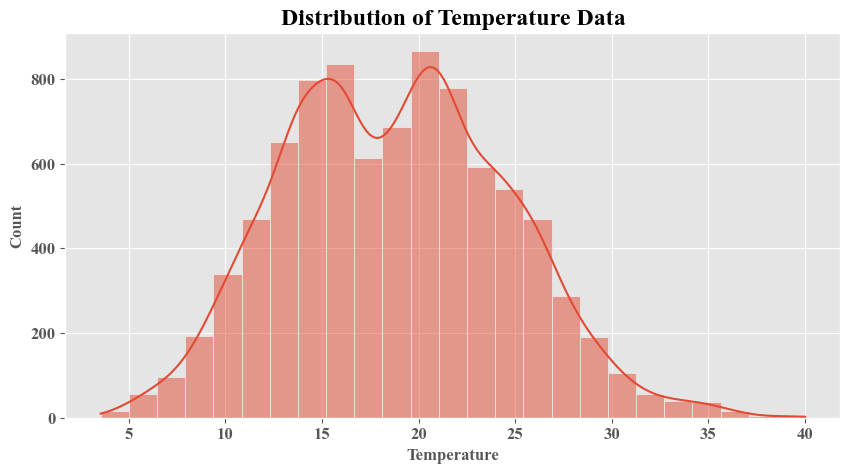

In [11]:
sns.histplot(data=df,x='Temperature',bins=25,kde=True)
plt.title('Distribution of Temperature Data')
plt.show()

Insights:
- The distribution of the temperature data follows a Bimodal distribution.
- The temperature of the city often lies between 15 to 25 degree celsius.

<IPython.core.display.Javascript object>

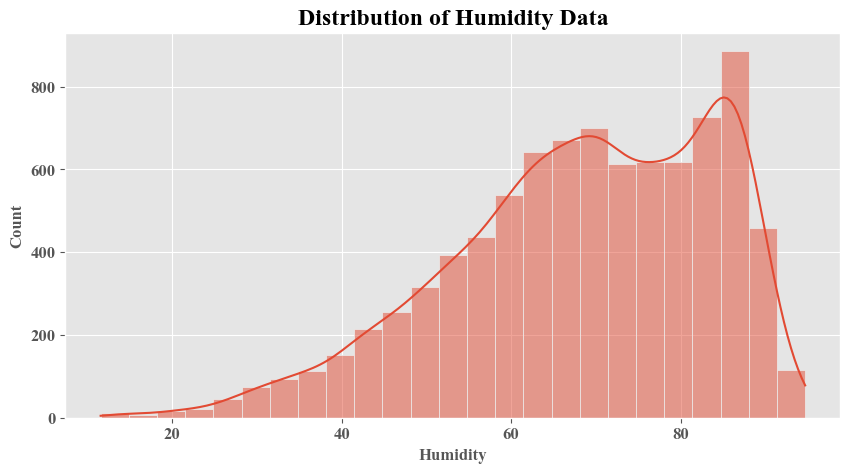

In [12]:
sns.histplot(data=df,x='Humidity',bins=25,kde=True)
plt.title('Distribution of Humidity Data')
plt.show()

Insights:
- Distribution of Humidity data is skewed towards left. Most of the data points lies in the right side end of the distribution.
- The Humidity level of the city is mostly between 80 to 95.

<IPython.core.display.Javascript object>

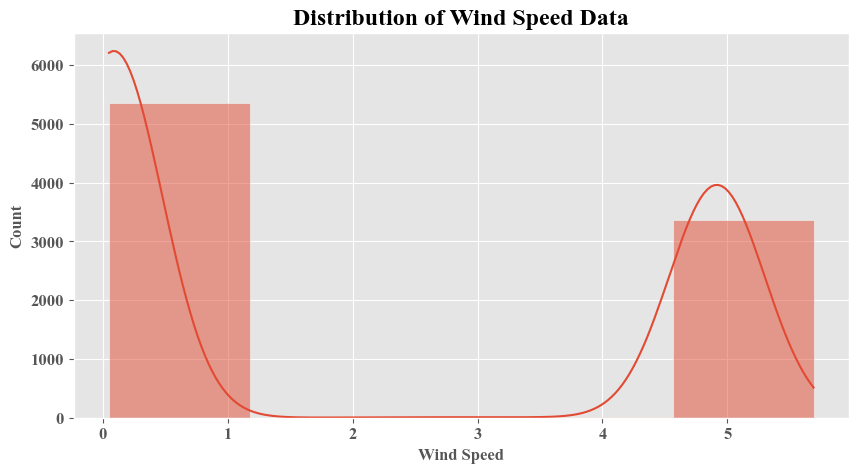

In [13]:
sns.histplot(data=df,x='Wind Speed',bins=5,kde=True)
plt.title('Distribution of Wind Speed Data')
plt.show()

Insights:
- From the distribution of wind speed we can infer that the wind speed of the city either between 0-1 mph or 4.5-5.5 mph mostly.

<IPython.core.display.Javascript object>

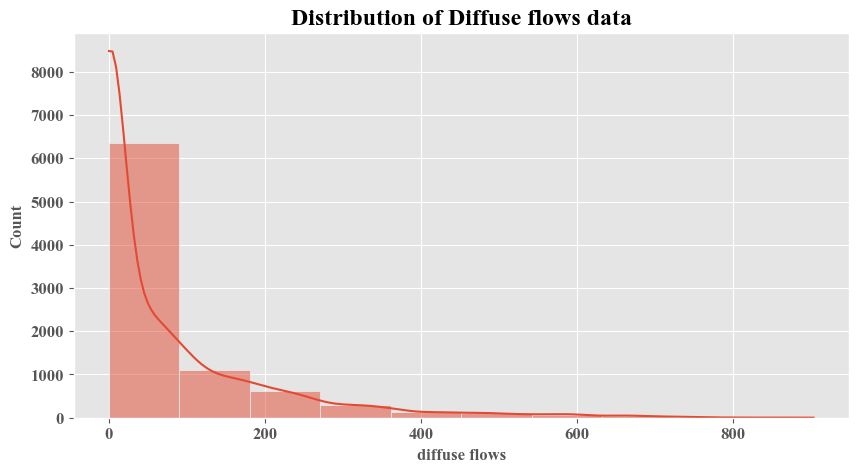

In [14]:
sns.histplot(data=df,x='diffuse flows',bins=10,kde=True)
plt.title('Distribution of Diffuse flows data')
plt.show()

Insights:
- From the distribution of diffuse flow data we can see that the flow is mostly between 0-100.

<IPython.core.display.Javascript object>

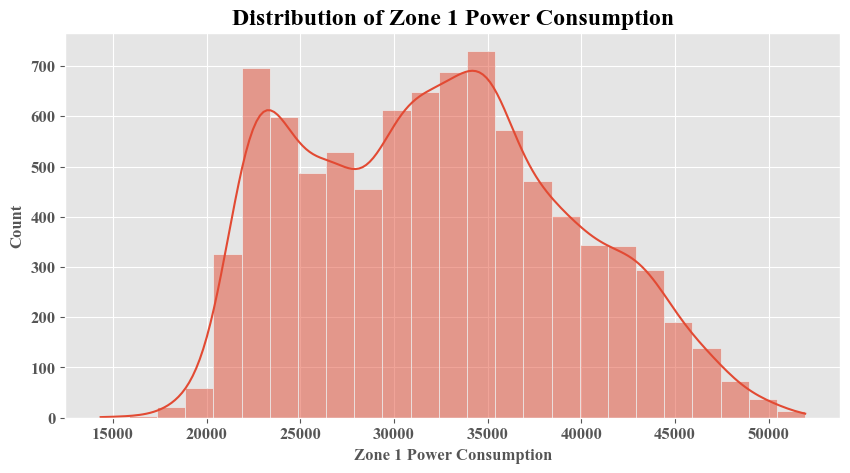

In [15]:
sns.histplot(data=df,x='Zone 1 Power Consumption',bins=25,kde=True)
plt.title('Distribution of Zone 1 Power Consumption')
plt.show()

Insights:
- The distributionof Zone 1 power consumption follows a bimodal distrbution.
- The power consumption of zone 1 often be at 25000MW or 35000MW.

<IPython.core.display.Javascript object>

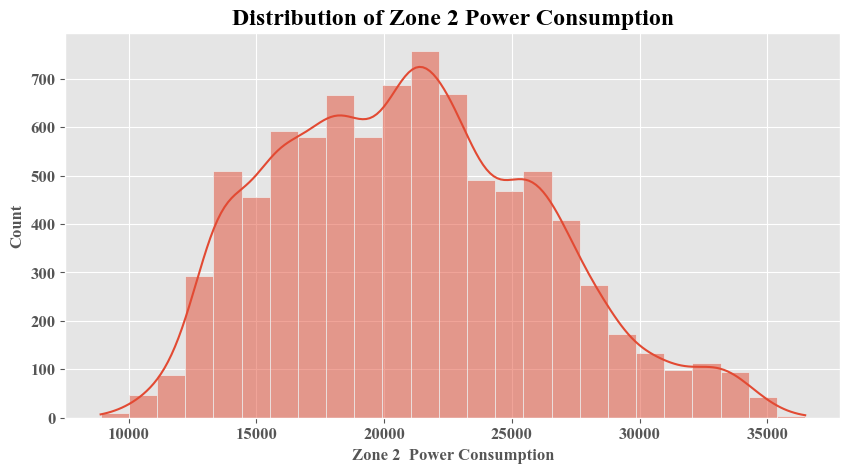

In [16]:
sns.histplot(data=df,x='Zone 2  Power Consumption',bins=25,kde=True)
plt.title('Distribution of Zone 2 Power Consumption')
plt.show()

Insights:
- The distributionof Zone 2 power consumption follows a near normal distrbution.
- The power consumption of zone 2 often between 20000MW to 30000MW.

<IPython.core.display.Javascript object>

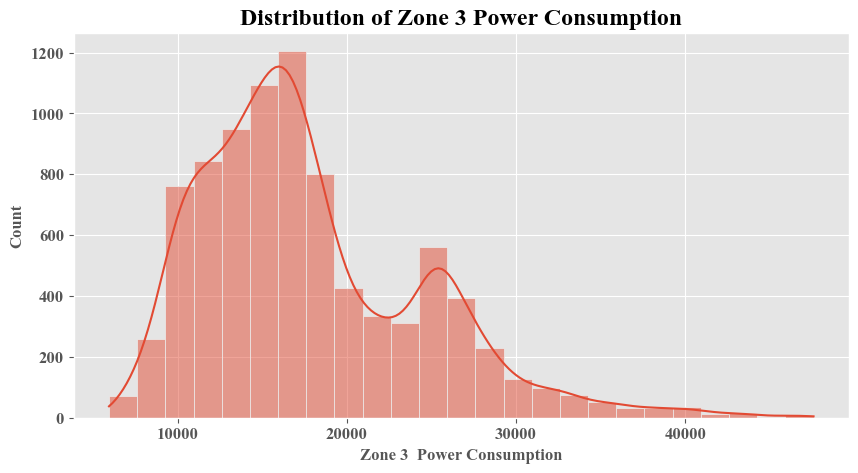

In [17]:
sns.histplot(data=df,x='Zone 3  Power Consumption',bins=25,kde=True)
plt.title('Distribution of Zone 3 Power Consumption')
plt.show()

Insights:

- The distributionof Zone 3 power consumption is skewed towards right and there are some outlier point in the left end of the distribution.
- The power consumption of zone 3 is around 15000MW mostly.

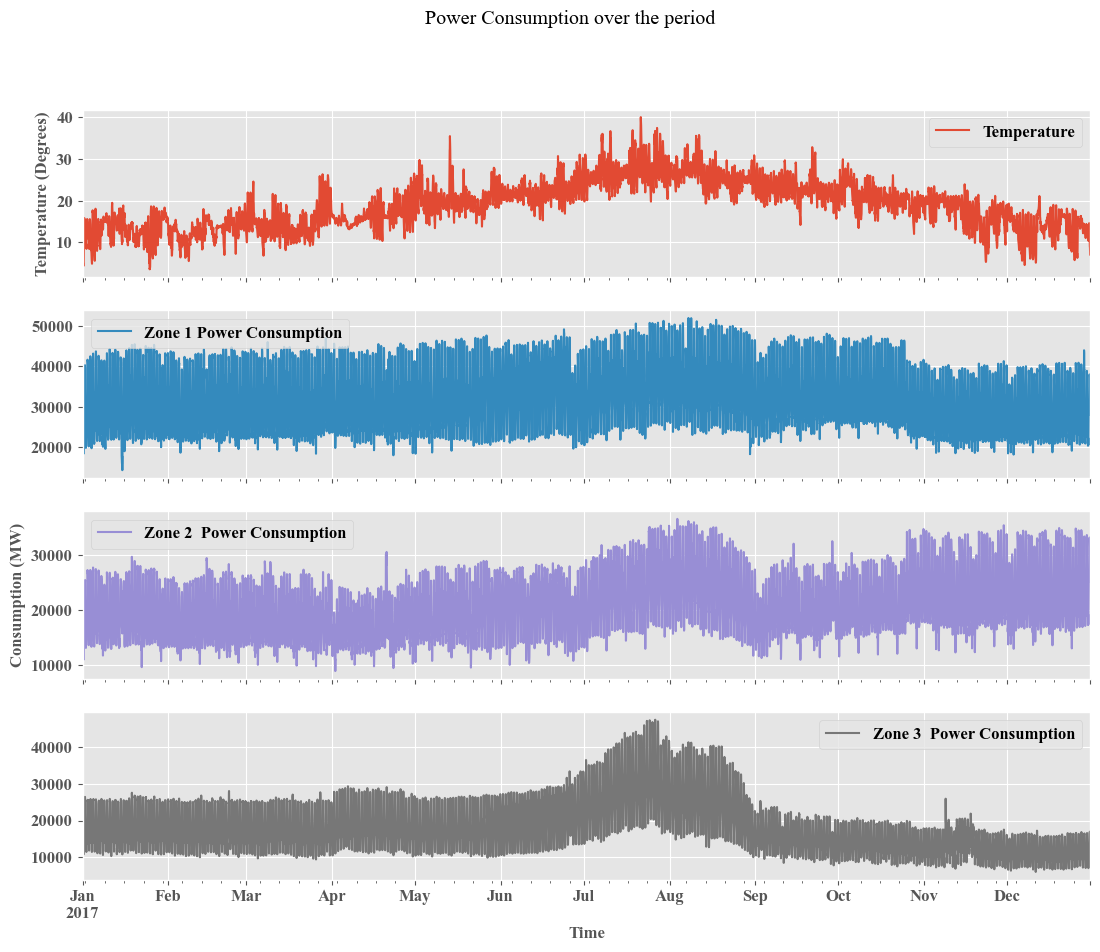

In [18]:
ax0,ax1,ax2,ax3=df[['Temperature','Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].plot(figsize=(13,10),subplots=True)
plt.xlabel('Time')
ax0.set_ylabel('Temperature (Degrees)')
ax2.set_ylabel('Consumption (MW)')
plt.suptitle('Power Consumption over the period')
plt.show()

Insights:
- From the above plots, we can see that in all three zones the consumption of power is peaking between Jul to Sep months. The temperature of the city is also peaking at this time in the city. July to Sep is the summer season in Tetouan city. People would use Air Conditioners during this time which might have causes a raise in consumption of Electricity.

### 5. Data Preprocessing:

In [19]:
df.isnull().sum()  #checking the number of null values in each column

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

- Dataset does not contain any missing values.

In [20]:
df.duplicated().sum()

0

- No duplicate records found in the dataset.

### 6. Feature Engineering:

In [21]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

- The aim of this project is to forecasting time series data. The models I am planning to use are Prophet and LSTM. It only requires a datetime feature and a target column. Hence, we can drop other columns and keep datetime and Power Consumption feature alone.

In [22]:
df['Power Consumption']=df['Zone 1 Power Consumption']+df['Zone 2  Power Consumption']+df['Zone 3  Power Consumption'] #combining all three zone consumption data into a single target

In [23]:
df.reset_index(inplace=True) #resetting index to default

df=df[['ds','Power Consumption']] #selecting the required features alone

### 6. Model Selection:

#### Prophet Model

- Prophet model will accept column names as 'ds' and 'y' only. So, we need to rename the columns accordingly.

In [24]:
df.rename(columns={'Power Consumption':'y'},inplace=True) #renaming the columns

- Since, the data is of time series kind, each observation is dependant on the previous observations. So that, we cannot split the records randomly. I am taking first 80% of the data for training and balance 20% of the data for testing.

In [25]:
df_train=df.iloc[:int(df.shape[0]*0.8),:]
df_test=df.iloc[int(df.shape[0]*0.8):,:]  #splitting the data into train and test

In [26]:
df_train.shape

(6988, 2)

In [27]:
df_test.shape

(1748, 2)

### 7. Model Training:

In [28]:
p=Prophet() #initializing Prophet model object

In [29]:
p.fit(df) #fitting the model for training

19:50:51 - cmdstanpy - INFO - Chain [1] start processing
19:50:55 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
future=p.make_future_dataframe(periods=720,freq='H',include_history=False) #generating 720 hours of time index for prediction

In [31]:
forecast=p.predict(df_test['ds'].to_frame()) #predicting the test data

In [32]:
unseen=p.predict(future) #predicting the future unseen data

In [33]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-19 04:00:00,66998.424450,46357.363032,60342.481890,66998.424450,66998.424450,-13840.860535,-13840.860535,-13840.860535,-15646.334701,-15646.334701,-15646.334701,1805.474166,1805.474166,1805.474166,0.0,0.0,0.0,53157.563915
1,2017-10-19 05:00:00,66995.959962,42748.065753,57102.397092,66995.959962,66995.959962,-16956.469260,-16956.469260,-16956.469260,-18751.141869,-18751.141869,-18751.141869,1794.672609,1794.672609,1794.672609,0.0,0.0,0.0,50039.490702
2,2017-10-19 06:00:00,66993.495474,40817.204164,55280.768276,66993.495474,66993.495474,-19101.812371,-19101.812371,-19101.812371,-20876.597970,-20876.597970,-20876.597970,1774.785599,1774.785599,1774.785599,0.0,0.0,0.0,47891.683103
3,2017-10-19 07:00:00,66991.030986,41771.109260,55935.272454,66991.030986,66991.030986,-18588.893892,-18588.893892,-18588.893892,-20334.954373,-20334.954373,-20334.954373,1746.060482,1746.060482,1746.060482,0.0,0.0,0.0,48402.137095
4,2017-10-19 08:00:00,66988.566499,45400.743647,59080.964826,66988.566499,66988.566499,-14901.678164,-14901.678164,-14901.678164,-16610.532969,-16610.532969,-16610.532969,1708.854806,1708.854806,1708.854806,0.0,0.0,0.0,52086.888335


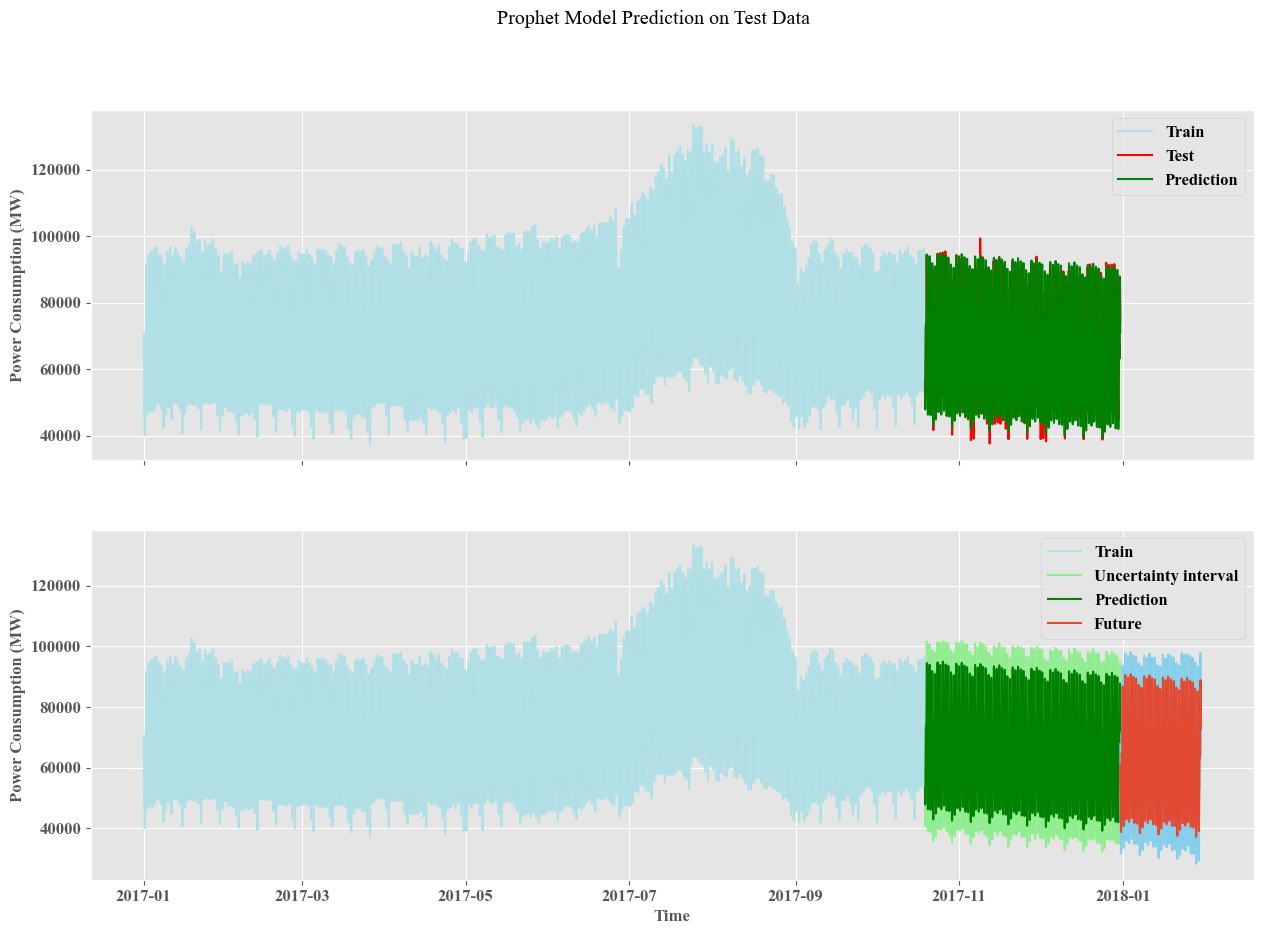

In [34]:
fig,ax=plt.subplots(2,1,figsize=(15,10),sharex=True)
ax[0].plot(df_train['ds'],df_train['y'],label='Train',color='powderblue')
ax[0].plot(df_test['ds'],df_test['y'],label='Test',color='red')
ax[0].plot(forecast['ds'],forecast['yhat'],label='Prediction',color='green')
ax[0].legend()
ax[0].set_ylabel('Power Consumption (MW)')


ax[1].plot(df_train['ds'],df_train['y'],label='Train',color='powderblue')
ax[1].plot(forecast['ds'],forecast['yhat_lower'],color='lightgreen',label='Uncertainty interval')
ax[1].plot(forecast['ds'],forecast['yhat_upper'],color='lightgreen')
ax[1].plot(forecast['ds'],forecast['yhat'],label='Prediction',color='green')
ax[1].plot(unseen['ds'],unseen['yhat_lower'],color='skyblue')
ax[1].plot(unseen['ds'],unseen['yhat_upper'],color='skyblue')
ax[1].plot(unseen['ds'],unseen['yhat'],label='Future')
ax[1].legend()
ax[1].set_ylabel('Power Consumption (MW)')
plt.suptitle('Prophet Model Prediction on Test Data')
plt.xlabel('Time')
plt.show()

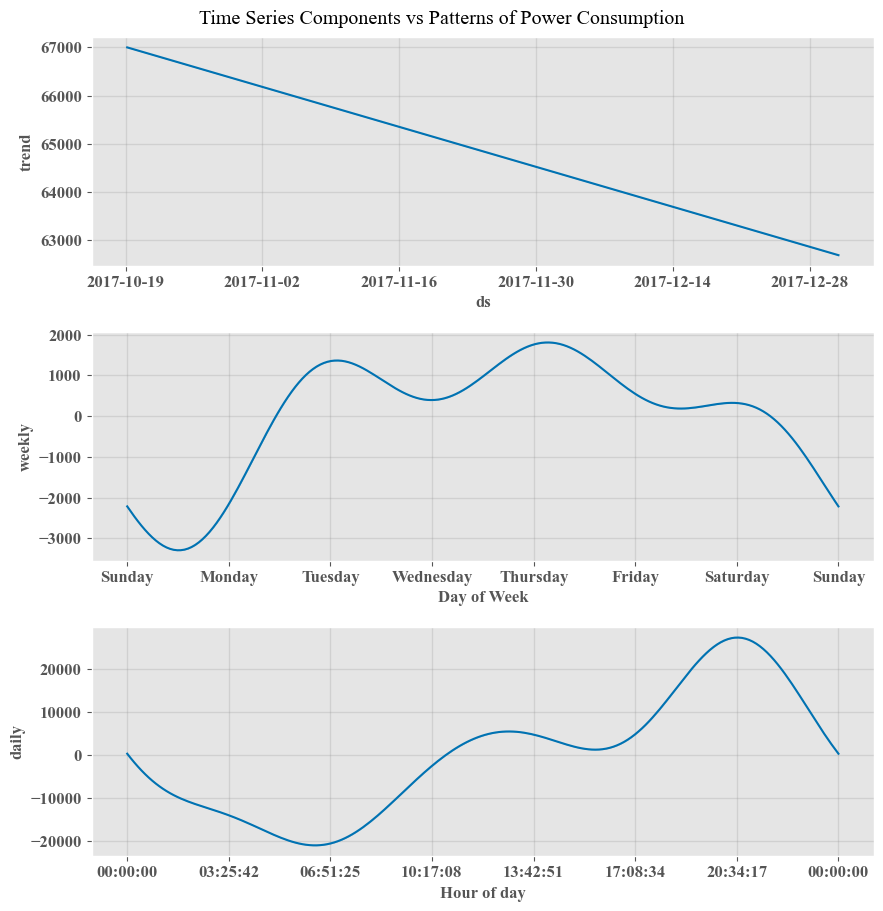

In [35]:
figure=p.plot_components(forecast)
figure.suptitle('Time Series Components vs Patterns of Power Consumption',y=0.995,va='baseline')
plt.show()

Insights:
- The trend of power consumption during prediction time is decreasing linearly.
- The average power consumption is in the peak during thursday and reaches its lowest point between sunday and monday.
- The average power consumption is maximum between 8 to 9 pm at night. The lowest consumption occurred in the morning time.

### LSTM Model

In [36]:
# splitting half of the test data for validation
data_val=df_test.iloc[:int(df_test.shape[0]*0.5)]
data_test=df_test.iloc[int(df_test.shape[0]*0.5):]

In [37]:
data_train=df_train.copy()

In [38]:
#function to create time lag components from the data
def data_shifter(data):
    data.set_index('ds',inplace=True)
    for i in range(1,6):
        data[f'y-{i}']=data['y'].shift(i,freq='H')
    return data

In [39]:
#dropping rows which has null values because of shifting
data_train_featured=data_shifter(data_train).dropna()

data_val_featured=data_shifter(data_val).dropna()

data_test_featured=data_shifter(data_test).dropna()

In [40]:
data_train_featured.shape,data_val_featured.shape,data_test_featured.shape #verifying # of observations in each split

((6983, 6), (869, 6), (869, 6))

In [41]:
#scaling data between the range of 0 to 1
scaler=MinMaxScaler()
dtf=scaler.fit_transform(data_train_featured)

dvf=scaler.transform(data_val_featured)

dtef=scaler.transform(data_test_featured)

In [42]:
tf.random.set_seed(1234)

In [43]:
#constructing a LSTM RNN model
model=Sequential()
model.add(layers.InputLayer((5,1)))
model.add(layers.LSTM(units=128,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units=128,return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


In [44]:
#compile the model structure with optimizers,loss and metrics parameters
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.mean_squared_error,metrics=[tf.keras.losses.mean_squared_error])

In [45]:
#setting a earlystopping callback to stop the training when the loss is not varying much
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [46]:
#training the model with input data
model.fit(dtf[:,1:6],dtf[:,0],validation_data=(dvf[:,1:6],
          dvf[:,0]),epochs=15,callbacks=[early_stop])

Epoch 1/15
219/219 [==============================] - 6s 14ms/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 2/15
219/219 [==============================] - 4s 17ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/15
219/219 [==============================] - 3s 12ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 4/15
219/219 [==============================] - 3s 12ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 5/15
219/219 [==============================] - 4s 19ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6/15
219/219 [==============================] - 3s 12ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 7/15
219/219 [==

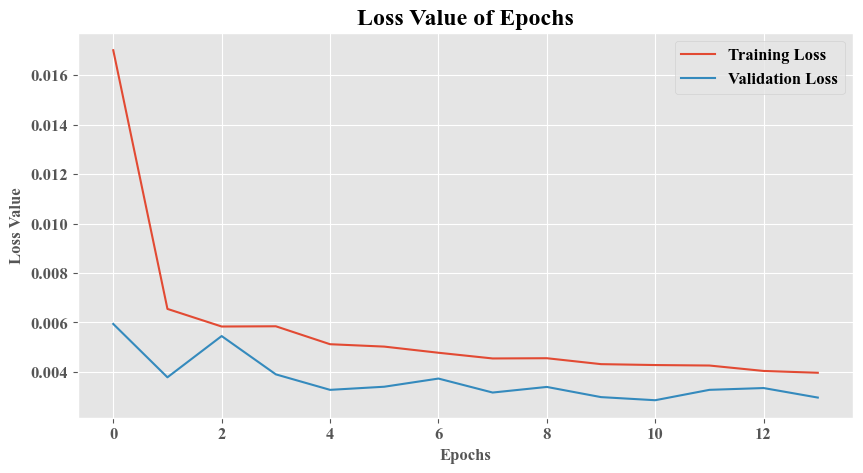

In [47]:
#plotting the Training and Validation loss terms
plt.plot(list(range(len(model.history.history['loss']))),model.history.history['loss'],label='Training Loss')
plt.plot(list(range(len(model.history.history['loss']))),model.history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title('Loss Value of Epochs')
plt.legend()
plt.show()

In [48]:
#predicting the test data with trained model
y_hat=model.predict(dtef[:,1:6],verbose=0)

In [49]:
#function to inverse the scaled data to its actual values
def inv_transform(data):
    return (data*(scaler.data_max_[0]-scaler.data_min_[0]))+scaler.data_min_[0]

In [50]:
y_hat_reversed=inv_transform(y_hat.flatten())

y_true_reversed=inv_transform(dtef[:,0])

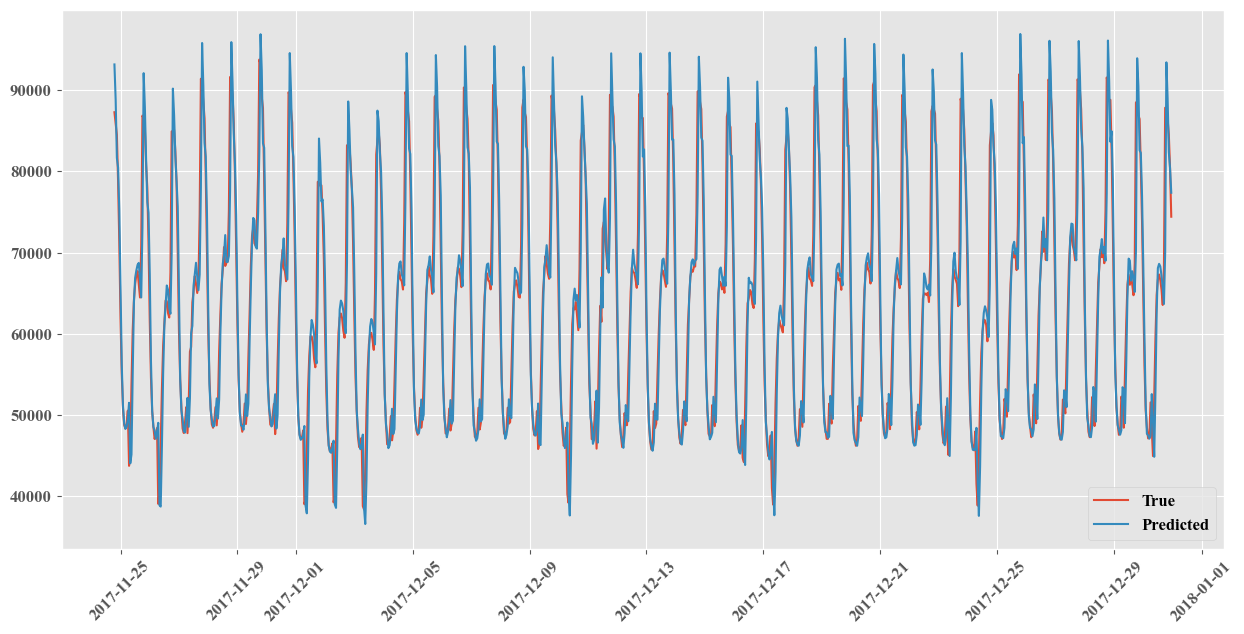

In [51]:
#plotting the True values of Target and Predicted values
plt.figure(figsize=(15,7))
plt.plot(data_test_featured.index,y_true_reversed,label='True')
plt.plot(data_test_featured.index,y_hat_reversed,label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [52]:
#function to generate future datapoints from the predictions
def future_predictions(num,start=dtef[-1,1:6].reshape(1,-1)):
    result=[]
    future_pred=pd.DataFrame()
    for i in range(num):
        pred=model.predict(start,verbose=0)[0][0]
        result.append(pred)
        start=start.flatten().tolist()
        future_pred[i]=start
        start.append(pred)
        start.pop(0)
        start=np.array(start).reshape(1,-1)
    future_pred=future_pred.T
    future_pred[5]=result
    return future_pred

In [53]:
fp=future_predictions(24)

fp[5]=inv_transform(fp[5])

fp.index=pd.date_range(start='2017-12-30 23:00:00',periods=24,freq='H')

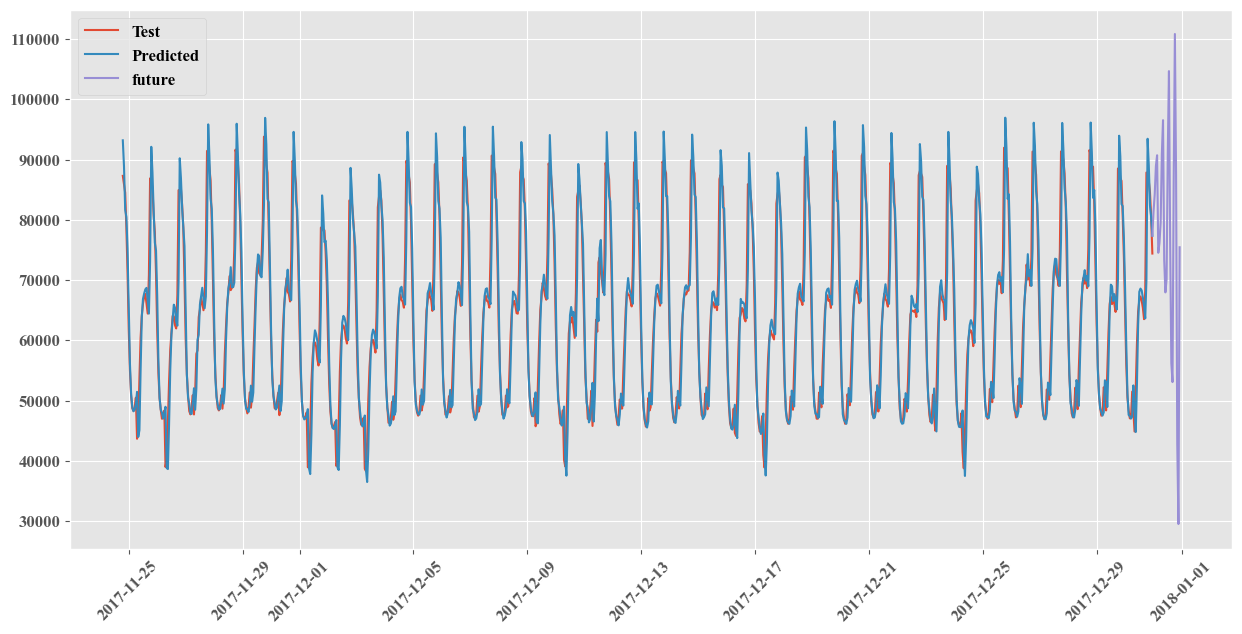

In [54]:
#plotting the future data points and predictions with existing data points
plt.figure(figsize=(15,7))
plt.plot(data_test_featured.index,y_true_reversed,label='Test')
plt.plot(data_test_featured.index,y_hat_reversed,label='Predicted')
plt.plot(fp.index,fp[5],label='future')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 8. Model Evaluation:

In [55]:
print(f"Prophet Model: \nMean Absolute Percentage Error: {mean_absolute_percentage_error(df_test['y'],forecast['yhat']):.2%}")

print(f"Accuracy Score: {r2_score(df_test['y'],forecast['yhat']):.2%}")

Prophet Model: 
Mean Absolute Percentage Error: 5.78%
Accuracy Score: 87.85%


In [56]:
print(f"LSTM Model: \nMean Absolute Percentage Error: {mean_absolute_percentage_error(y_true_reversed,y_hat_reversed):.2%}")

print(f"Accuracy Score: {r2_score(y_true_reversed,y_hat_reversed):.2%}")

LSTM Model: 
Mean Absolute Percentage Error: 4.69%
Accuracy Score: 90.06%


### Summary:

- loaded the data as a pandas dataframe.
- Analyzed the outline of the data, datatypes and summary of the data.
- Performed exploratory data analysis to understand the distribution of the data and relationship of each feature with target variable.
- Checked the number of missing values and duplicates in the data.
- Built two models (Prophet and LSTM Recurrent Neural Network) to forecast power consumption data.
- Evaluated the performance of the models with different metrics (MAPE and Accuracy).
- Based on the evaluation, concluding that the LSTM recurrent neural network model performed well in forecasting the power consumption data with mean absolute percentage error of 4% and accuracy score of 90%.